## ИМПОРТЫ

In [ ]:
%%capture
!pip install razdel
!pip install rusenttokenize
!pip install pymorphy2
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model
!pip install pyLDAvis

In [ ]:
import pandas as pd
import nltk 
from nltk import tokenize # готовый токенизатор библиотеки nltk
import string
from rusenttokenize import ru_sent_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO
import matplotlib
from collections import Counter
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import gensim.corpora as corpora
from gensim.models import LdaMulticore, CoherenceModel
from tqdm import tqdm
import warnings
from gensim.models import LdaMulticore, CoherenceModel
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
import networkx as nx

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
link = "https://raw.githubusercontent.com/IYunet/VIM-2022/main/4%20task/vk_vine.csv"
db = pd.read_csv(link)
#len(db.message.unique())
db = pd.DataFrame(db.iloc[:,1])
db

,message
0,Завод и промышленное производство - ровное пых...
1,"“Август.\nПерсики и цукаты,\nи в медовой росе ..."
2,Море + вино = (всегда) ИдеальнаяПара\n\nБез ли...
3,"#ZналиЛиВы, что грифон - это достаточно распро..."
4,Предлагаем отметить начало последней недели ию...
...,...
2395,"Знаете ли вы, как появился аперитив? По одной ..."
2396,"Надеемся, что вы уже восстановились после праз..."
2397,"#apresski от ""Золотой Балки"" в Красной поляне⛷..."
2398,"Такие сильные, смелые и независимые байкеры т..."


## Обработка текста 

In [ ]:
#приведение к нижнему регистру
db = db.fillna('')
#db["lower_letter"] = db.message.apply(str.lower)
db["message"] = db.message.apply(str.lower)

In [ ]:
# одновременно удалили пунктуацию и разбили на токены
clean = []
for i in range(len(db.message)):
  tokens = tokenize.RegexpTokenizer(r'\w+').tokenize(db.message[i])
  clean += [tokens]
db["clean"] = clean
db

,message,clean
0,завод и промышленное производство - ровное пых...,"[завод, и, промышленное, производство, ровное,..."
1,"“август.\nперсики и цукаты,\nи в медовой росе ...","[август, персики, и, цукаты, и, в, медовой, ро..."
2,море + вино = (всегда) идеальнаяпара\n\nбез ли...,"[море, вино, всегда, идеальнаяпара, без, лишни..."
3,"#zналиливы, что грифон - это достаточно распро...","[zналиливы, что, грифон, это, достаточно, расп..."
4,предлагаем отметить начало последней недели ию...,"[предлагаем, отметить, начало, последней, неде..."
...,...,...
2395,"знаете ли вы, как появился аперитив? по одной ...","[знаете, ли, вы, как, появился, аперитив, по, ..."
2396,"надеемся, что вы уже восстановились после праз...","[надеемся, что, вы, уже, восстановились, после..."
2397,"#apresski от ""золотой балки"" в красной поляне⛷...","[apresski, от, золотой, балки, в, красной, пол..."
2398,"такие сильные, смелые и независимые байкеры т...","[такие, сильные, смелые, и, независимые, байке..."


In [ ]:
#удалили стоп слова
words = []
stop_word = stopwords.words('russian')
for i in range(len(db.clean)):
  temp_words = []
  for j in db.clean[i]:
    if not j in stop_word:
       temp_words.append(j)
  words += [temp_words]
db["w_sw"] = words
db

,message,clean,w_sw
0,завод и промышленное производство - ровное пых...,"[завод, и, промышленное, производство, ровное,...","[завод, промышленное, производство, ровное, пы..."
1,"“август.\nперсики и цукаты,\nи в медовой росе ...","[август, персики, и, цукаты, и, в, медовой, ро...","[август, персики, цукаты, медовой, росе, покос..."
2,море + вино = (всегда) идеальнаяпара\n\nбез ли...,"[море, вино, всегда, идеальнаяпара, без, лишни...","[море, вино, идеальнаяпара, лишних, слов, прос..."
3,"#zналиливы, что грифон - это достаточно распро...","[zналиливы, что, грифон, это, достаточно, расп...","[zналиливы, грифон, это, достаточно, распростр..."
4,предлагаем отметить начало последней недели ию...,"[предлагаем, отметить, начало, последней, неде...","[предлагаем, отметить, начало, последней, неде..."
...,...,...,...
2395,"знаете ли вы, как появился аперитив? по одной ...","[знаете, ли, вы, как, появился, аперитив, по, ...","[знаете, появился, аперитив, одной, версий, тр..."
2396,"надеемся, что вы уже восстановились после праз...","[надеемся, что, вы, уже, восстановились, после...","[надеемся, восстановились, праздничных, гастро..."
2397,"#apresski от ""золотой балки"" в красной поляне⛷...","[apresski, от, золотой, балки, в, красной, пол...","[apresski, золотой, балки, красной, поляне, жд..."
2398,"такие сильные, смелые и независимые байкеры т...","[такие, сильные, смелые, и, независимые, байке...","[такие, сильные, смелые, независимые, байкеры,..."


In [ ]:
#удаление английских буквы
for i in range(len(db.w_sw)):
  text = []
  for j in db.w_sw[i]:
    text.append(re.sub('[^а-яА-Я]', "", j))
  db.w_sw[i] = text
for i in range(len(db.w_sw)):
  db.w_sw[i] = list(filter(None, db.w_sw[i]))
db

,message,clean,w_sw
0,завод и промышленное производство - ровное пых...,"[завод, и, промышленное, производство, ровное,...","[завод, промышленное, производство, ровное, пы..."
1,"“август.\nперсики и цукаты,\nи в медовой росе ...","[август, персики, и, цукаты, и, в, медовой, ро...","[август, персики, цукаты, медовой, росе, покос..."
2,море + вино = (всегда) идеальнаяпара\n\nбез ли...,"[море, вино, всегда, идеальнаяпара, без, лишни...","[море, вино, идеальнаяпара, лишних, слов, прос..."
3,"#zналиливы, что грифон - это достаточно распро...","[zналиливы, что, грифон, это, достаточно, расп...","[налиливы, грифон, это, достаточно, распростра..."
4,предлагаем отметить начало последней недели ию...,"[предлагаем, отметить, начало, последней, неде...","[предлагаем, отметить, начало, последней, неде..."
...,...,...,...
2395,"знаете ли вы, как появился аперитив? по одной ...","[знаете, ли, вы, как, появился, аперитив, по, ...","[знаете, появился, аперитив, одной, версий, тр..."
2396,"надеемся, что вы уже восстановились после праз...","[надеемся, что, вы, уже, восстановились, после...","[надеемся, восстановились, праздничных, гастро..."
2397,"#apresski от ""золотой балки"" в красной поляне⛷...","[apresski, от, золотой, балки, в, красной, пол...","[золотой, балки, красной, поляне, ждм, самых, ..."
2398,"такие сильные, смелые и независимые байкеры т...","[такие, сильные, смелые, и, независимые, байке...","[такие, сильные, смелые, независимые, байкеры,..."


In [ ]:
#морфологический анализ
db["morpho_token"] = ""
db["morpho_sentence"] = " "
pymorphy2_analyzer = MorphAnalyzer()
for i in range(len(db.w_sw)):
  lemmatized_output = ' '.join([pymorphy2_analyzer.parse(w)[0].normal_form for w in db.w_sw[i]])
  db["morpho_sentence"][i] = lemmatized_output
  db["morpho_token"][i] = word_tokenize(lemmatized_output)
#удаляем стоп слова для частного анализа
words = []
stop_word = stopwords.words('russian') + ['который','это', 'наш','год','день','новый']
for i in range(len(db.morpho_token)):
  temp_words = []
  for j in db.morpho_token[i]:
    if not j in stop_word:
       temp_words.append(j)
  words += [temp_words]
db["morpho_token"] = words
db

/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.g

,message,clean,w_sw,morpho_token,morpho_sentence
0,завод и промышленное производство - ровное пых...,"[завод, и, промышленное, производство, ровное,...","[завод, промышленное, производство, ровное, пы...","[завод, промышленный, производство, ровный, пы...",завод промышленный производство ровный пыхтени...
1,"“август.\nперсики и цукаты,\nи в медовой росе ...","[август, персики, и, цукаты, и, в, медовой, ро...","[август, персики, цукаты, медовой, росе, покос...","[август, персик, цукат, медовой, роса, покос, ...",август персик цукат медовой роса покос входить...
2,море + вино = (всегда) идеальнаяпара\n\nбез ли...,"[море, вино, всегда, идеальнаяпара, без, лишни...","[море, вино, идеальнаяпара, лишних, слов, прос...","[море, вино, идеальнаяпар, лишний, слово, прос...",море вино идеальнаяпар лишний слово просто пож...
3,"#zналиливы, что грифон - это достаточно распро...","[zналиливы, что, грифон, это, достаточно, расп...","[налиливы, грифон, это, достаточно, распростра...","[налилив, грифон, достаточно, распространить, ...",налилив грифон это достаточно распространить г...
4,предлагаем отметить начало последней недели ию...,"[предлагаем, отметить, начало, последней, неде...","[предлагаем, отметить, начало, последней, неде...","[предлагать, отметить, начало, последний, неде...",предлагать отметить начало последний неделя ию...
...,...,...,...,...,...
2395,"знаете ли вы, как появился аперитив? по одной ...","[знаете, ли, вы, как, появился, аперитив, по, ...","[знаете, появился, аперитив, одной, версий, тр...","[знать, появиться, аперитив, версия, традиция,...",знать появиться аперитив один версия традиция ...
2396,"надеемся, что вы уже восстановились после праз...","[надеемся, что, вы, уже, восстановились, после...","[надеемся, восстановились, праздничных, гастро...","[надеяться, восстановиться, праздничный, гастр...",надеяться восстановиться праздничный гастроном...
2397,"#apresski от ""золотой балки"" в красной поляне⛷...","[apresski, от, золотой, балки, в, красной, пол...","[золотой, балки, красной, поляне, ждм, самых, ...","[золотой, балка, красный, полянин, ждм, самый,...",золотой балка красный полянин ждм самый заядлы...
2398,"такие сильные, смелые и независимые байкеры т...","[такие, сильные, смелые, и, независимые, байке...","[такие, сильные, смелые, независимые, байкеры,...","[сильный, смелый, независимый, байкер, выбират...",такой сильный смелый независимый байкер выбира...


## Частотный анализ биграмм и униграмм и построение облака/облаков слов

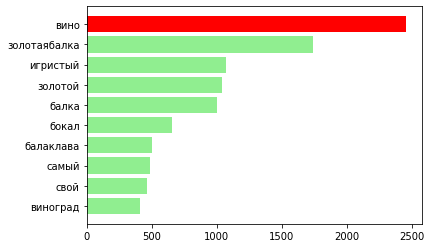

In [ ]:
#частотный анализ
all_words = []
for doc in db.morpho_token.tolist():
  all_words.extend(doc)
res = pd.DataFrame(all_words, columns=["terms"])
vis = pd.DataFrame(res.terms.value_counts()).sort_values(by="terms", ascending=False)[:10].sort_values(by="terms")
colors = ["lightgreen" for _ in range(9)]+["red"]
plt.barh(y=vis.index, width=vis.terms, color=colors)
plt.show()

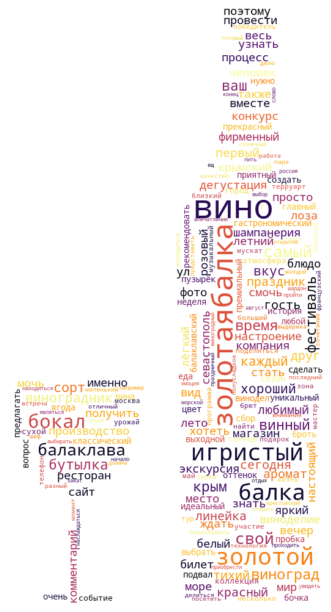

In [ ]:
words = dict(Counter(all_words))
# генерируем маску
url = "https://www.pinclipart.com/picdir/big/574-5744268_dessert-wine-red-wine-beer-glass-bottle-glass.png"

response = requests.get(url)
cloud_mask = np.array(Image.open(BytesIO(response.content)))

# складываем облако слов в маску
wc = WordCloud(background_color="white", max_words=200, mask=cloud_mask, colormap=matplotlib.cm.inferno)
wc.generate_from_frequencies(words)

# визуализируем
plt.figure(figsize=(11, 11))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

**ВЫВОД:** При изучении данных из паблика россиской винодельни "Золотая балка" видно, что самым упоминаемым словом является "вино". Также, если знать особенности этой винодельни, то оно базируются на продажах игристых вин марки "Балаклава", что отражено в частотном анализе

## Анализ тональности

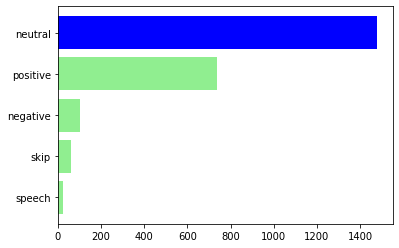

In [ ]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = db.morpho_sentence.tolist()

results = model.predict(messages, k=1)
sent = []

for message, sentiment in zip(messages, results):
    sent.append(list(sentiment.keys())[0])

db["sentiment"] = sent

vis = pd.DataFrame(db.sentiment.value_counts()).sort_values(by="sentiment")

colors = ["lightgreen" for _ in range(4)]+["blue"]
plt.barh(y=vis.index, width=vis.sentiment, color=colors)
plt.show()

**ВЫВОД:** В целом слова в постах в паблике вк состоят в основном из нейтральных слов и позитивных. Доверять оценке библиотеки мы можем примерно на 71%, что является хорошим показателем. Библиотека dostoevsky дает F1-меру в 71%

## Тематичекое моделирование

In [ ]:
id2word = corpora.Dictionary(db.morpho_token.tolist())
texts = db.morpho_token.tolist()
corpus = [id2word.doc2bow(text) for text in texts]
warnings.filterwarnings("ignore")

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
	Подсчет c_v когерентности для различного количества тем
	dictionary : Gensim словарь
	corpus : Gensim корпус
	texts : Список текста
	limit : Максимальное количество тем
	
	model_list : Список LDA моделей
	coherence_values :Когерентности, соответствующие модели LDA с количеством тем
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
	
# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=20, step=1)

100%|██████████| 18/18 [01:15<00:00,  4.22s/it]


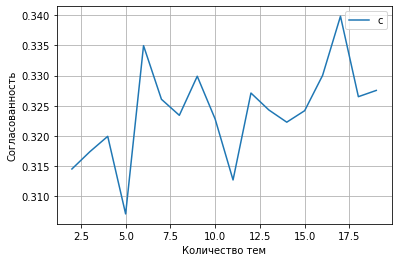

In [ ]:
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.grid()
plt.show()

**ВЫВОД:** Наименьшая согласованость достигается, когда тем 5, стоит рассмотреть именно эти темы

In [ ]:
n_topics = 5
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=n_topics)
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.038754 -0.037918       1        1  25.488885
3     -0.034307  0.038828       2        1  21.369956
1      0.004630  0.025123       3        1  20.955956
0      0.019205 -0.034236       4        1  20.293242
2      0.049227  0.008203       5        1  11.891961, topic_info=              Term         Freq        Total Category  logprob  loglift
821      фестиваль   415.000000   415.000000  Default  30.0000  30.0000
3902  золотаябалка  1909.000000  1909.000000  Default  29.0000  29.0000
137          бокал   420.000000   420.000000  Default  28.0000  28.0000
105      балаклава   548.000000   548.000000  Default  27.0000  27.0000
585    виноградник   332.000000   332.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
54         сегодня    28.555696   233.779934   Topic5  -5.9962   0.0268
251         каждый    27.904276   244.641237   Topic5  -6.0193  -0.0417
51           самый    33.470652   485.279455   Topic5  -5.8374  -0.5447
34          первый    28.834522   312.677876   Topic5  -5.9865  -0.2543
162            ваш    26.019269   326.535810   Topic5  -6.0892  -0.4004

[439 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
77        1  0.093154  август
77        2  0.155256  август
77        3  0.165606  август
77        4  0.507169  август
77        5  0.082803  август
...     ...       ...     ...
1149      1  0.251433   яркий
1149      2  0.313009   яркий
1149      3  0.189858   яркий
1149      4  0.092363   яркий
1149      5  0.148807   яркий

[966 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

**ВЫВОД** четко выделено 5 тем: дегустация вина, магазин вина, винные плантации, настроение и вино, конкурс на вино

## Построение графовой модели корпуса

In [ ]:
!pip uninstall matplotlib==3.2.2

In [ ]:
!pip install matplotlib==2.2.3

In [ ]:
#отбираем пары для графа
pairs = []
for doc in db.morpho_token.tolist():
  if doc:
    b = list((nltk.bigrams(doc)))
    if b:
      pairs.extend(b)
pairs = [tuple(sorted(pair)) for pair in pairs]
word_pairs = dict(Counter(pairs))
word_pairs = [(pair[0], pair[1], val) for pair, val in word_pairs.items() if val > 10]

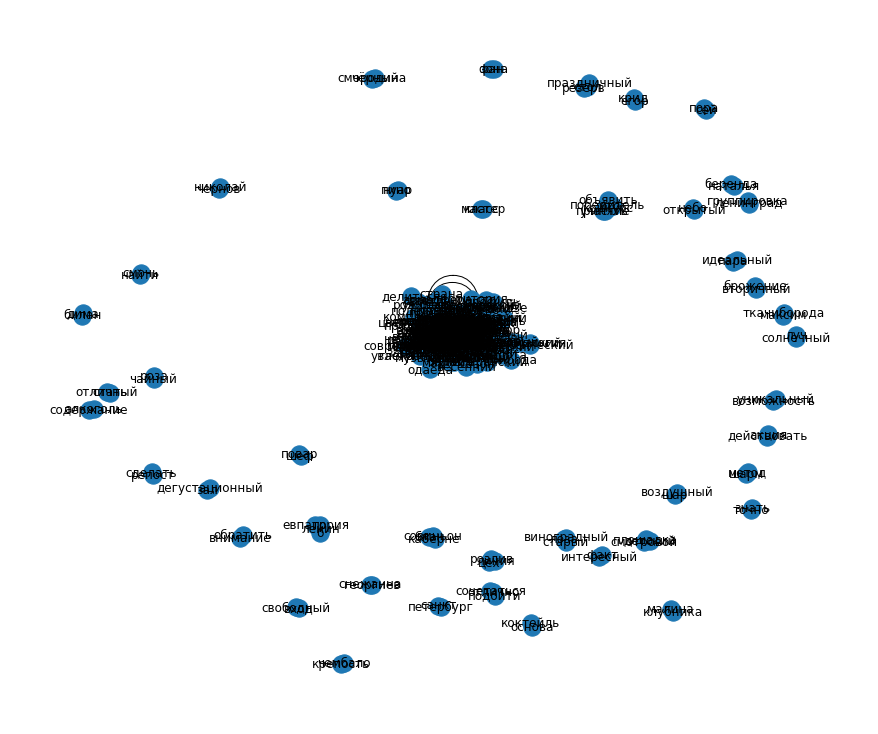

In [ ]:
#граф
G = nx.Graph()
edges = word_pairs
plt.figure(figsize=(12,10))
G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [ ]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)
remove_edge = [pair for pair in G.edges() if pair[0] in remove and pair[1] in remove]
G.remove_edges_from(remove_edge)
remove = [node for node, degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)
node_sizes = [deg*8 for node, deg in dict(G.degree()).items()]

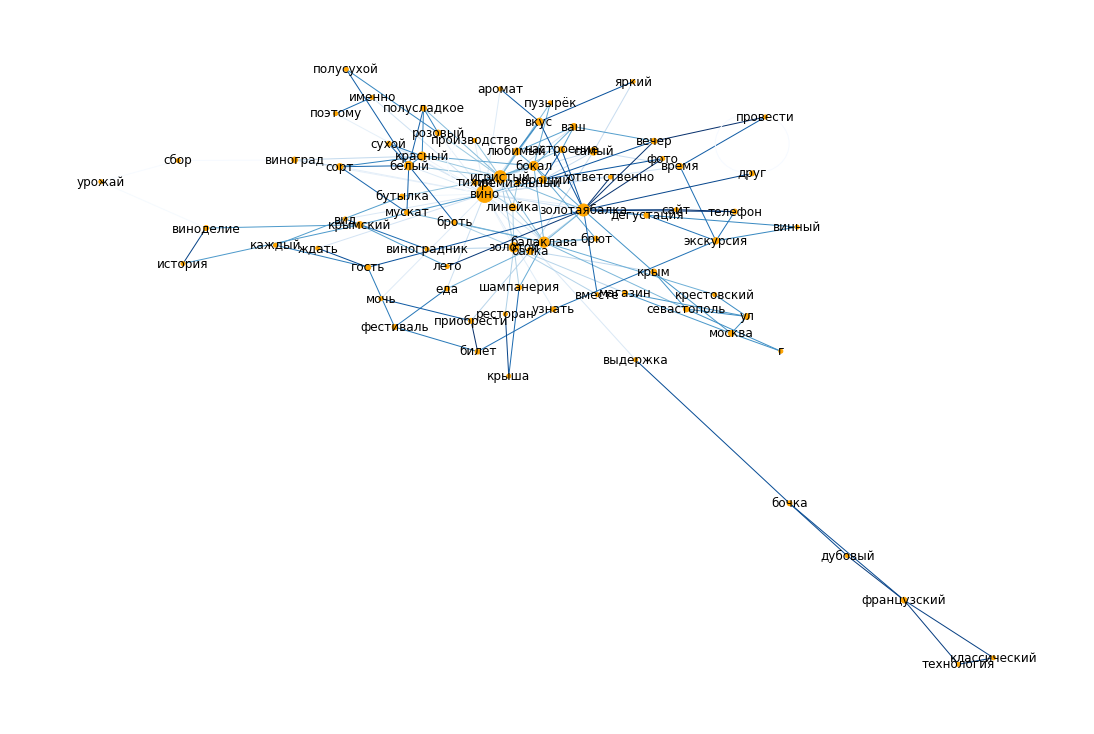

In [ ]:
plt.figure(figsize=(15,10))
pos = nx.layout.spring_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='orange', node_size=node_sizes, edgelist=G.edges(), edge_color=range(len(G.edges())), width=1.0, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

**ВЫВОД:** Из графа видно,что самые популряные слова связаны друг с другом, ведь между ними есть связь. Также мы можем утверждать, что слова связаны по смыслу, если приглядимся к самой длинной ветке: бочка-дубовый и т.д. То есть получившийся граф отображает не просто связь между словами, но и логику их соединения